<a href="https://colab.research.google.com/github/OscarRojasG/ADA-Informes/blob/main/Informe8-OptimalBST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema del árbol de búsqueda óptimo

**Entrada**: Secuencia ordenada de $n$ claves: $K=\left<k_1,k_2,...,k_n\right>$. Cada clave $k_i$ tiene una probabilidad $p_i$ de ser buscada. Existen claves ficticias $d_i$ que representan búsquedas fallidas con $k_{i-1} \leq d_i \leq k_i$. Cada clave $d_i$ tiene una probabilidad $q_i$ de ser buscada. La suma de probabilidades debe ser uno, es decir: $\sum\limits_{i=1}^n p_i + \sum\limits_{j=0}^n q_i = 1$

**Salida**: Árbol de búsqueda óptimo que minimice la cantidad esperada de nodos visitados (costo esperado).

El problema del árbol de búsqueda óptimo (Optimal BST), consiste en encontrar una configuración para los nodos de un árbol con el fin de minimizar la cantidad promedio de nodos visitados por cada búsqueda. En el caso de que cada nodo tenga la misma probabilidad de ser buscado, esto no sería problema, pues la solución simplemente consistiría en balancear el árbol. Sin embargo, esto no siempre es así, pues existirán casos en los que cada nodo tenga una frecuencia o probabilidad de búsqueda distinta a los demás.

La cantidad promedio de nodos visitados por cada búsqueda se denomina **costo esperado**, y se calcula multiplicando el costo de cada nodo por su probabilidad de búsqueda.

$\text{costo esperado} = \sum\limits_i p_i c_i$

El costo $c_i$ de cada nodo es igual a su altura más uno. Por ejemplo, si consideramos la altura del nodo raíz como 0, entonces su costo será 1.

Consideremos el siguiente ejemplo para entender el problema. Tenemos 3 nodos con claves $E$, $F$ y $G$, cuyas probabilidades de búsqueda son $p_E = 0.7$, $p_F = 0.2$ y $p_G = 0.1$. ¿Cuál es el árbol de búsqueda que minimiza el costo esperado? Consideremos estos 3 casos:

<img src="https://drive.google.com/uc?export=view&id=1J401uwFuhHmFvy5GvSdi86-pvUkiWa6n" width="600"/>

Cabe destacar que en total existen 5 permutaciones distintas para 3 nodos, sin embargo, para este ejemplo solo consideraremos estas 3.

En primer lugar, observemos que cada uno de estos árboles cumple con la propiedad del árbol de búsqueda: los nodos menores están ubicados a la izquierda de la raíz, y los mayores a la derecha. Debemos encontrar aquel donde el costo esperado de búsqueda sea menor, para ello, realizamos el cálculo correspondiente para cada árbol:

$\text{costo esperado (1)} = p_E \cdot c_E + p_F \cdot c_F + p_G \cdot c_G = 0.7 \cdot 2 + 0.2 \cdot 1 + 0.1 \cdot 2 = 1.8$

$\text{costo esperado (2)} = p_E \cdot c_E + p_F \cdot c_F + p_G \cdot c_G = 0.7 \cdot 1 + 0.2 \cdot 2 + 0.1 \cdot 3 = 1.4$

$\text{costo esperado (3)} = p_E \cdot c_E + p_F \cdot c_F + p_G \cdot c_G = 0.7 \cdot 2 + 0.2 \cdot 3 + 0.1 \cdot 1 = 2.1$

Considerando los resultados obtenidos, el árbol de búsqueda óptimo corresponde a la opción 2, pues tiene un menor costo esperado. Este ejemplo es una simplificación del problema real, pues en la práctica, también debemos considerar el caso de las búsquedas fallidas. Para ello, lo único que debemos hacer es prolongar el árbol añadiendo **claves ficticias** (dummy keys) que representarán el caso cuando el nodo buscado no se encuentre en el árbol. En la siguiente imagen, las claves $k$ corresponden a claves reales, mientras que las claves $d$ corresponden a claves ficticias:

<img src="https://drive.google.com/uc?export=view&id=1pK8UnfLdhliNLKJaiGoCSWrbtT_ZpEDu" width="400"/>

Por último, es importante mencionar que las claves ficticias también tienen una probabilidad de búsqueda asignada, que en conjunto con las probabilidades de búsqueda de las claves reales deben sumar 1.




# 2. Optimal BST

## 2.1 Código 

### Funciones auxiliares

In [2]:
class Node:
  parent = None
  right = None
  left = None
  key = None
  
  def __init__(self, key):
    self.key = key 

class Tree:
  root = None

  def set_left_subtree(self, tree):
    self.root.left = tree.root
    if tree.root: tree.root.parent = self.root

  def set_right_subtree(self, tree):
    self.root.right = tree.root
    if tree.root: tree.root.parent = self.root

  def set_root(self, key):
    self.root = Node(key)

  def get_nodes(self, root):
    if root == None: return []

    n_left = self.get_nodes(root.left)
    n_right = self.get_nodes(root.right)

    n = n_left + n_right
    n.append(root)

    return n

In [3]:
import networkx as nx

# Obtenido de https://stackoverflow.com/questions/33439810/

def binary_tree_layout(G, root, width=1., vert_gap = 0.2, vert_loc = 0, 
                       xcenter = 0.5, pos = None, parent = None):
  if pos == None:
    pos = {root:(xcenter, vert_loc)}
  else:
    pos[root] = (xcenter, vert_loc)

  neighbors = list(G.neighbors(root))

  if len(neighbors) != 0:

    dx = width/2.
    leftx = xcenter - dx/2
    rightx = xcenter + dx/2

    for neighbor in neighbors:
      if G.nodes[neighbor]['child_status'] == 'LEFT':
        pos = binary_tree_layout(G, neighbor, width = dx, vert_gap = vert_gap, 
                                 vert_loc = vert_loc-vert_gap, xcenter=leftx, 
                                 pos=pos, parent = root)
        
      elif G.nodes[neighbor]['child_status'] == 'RIGHT':
        pos = binary_tree_layout(G, neighbor, width = dx, vert_gap = vert_gap,
                                 vert_loc = vert_loc-vert_gap, xcenter=rightx,
                                 pos=pos, parent = root)
        
  return pos

In [4]:
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

def visualize_tree(tree):
  T = nx.DiGraph()
  N = tree.get_nodes(tree.root)

  for i in range(len(N)): 
    if N[i].parent == None:
      T.add_node(N[i].key, child_status='LEFT')
      continue

    if N[i].parent.left == N[i]:
      T.add_node(N[i].key, child_status='LEFT')
    else:
      T.add_node(N[i].key, child_status='RIGHT')

    T.add_edge(N[i].parent.key, N[i].key)

  tree_pos = binary_tree_layout(T, tree.root.key)
  nx.draw(T, tree_pos, with_labels=True, font_size=12, node_size=1000, node_color='white', edgecolors='black')

In [5]:
from termcolor import colored

def print_matrix(A, m, n, k, color):
  print("%2s " % '', end='')
  for i in range(1,m):
    print("%-5d " % (i-1), end='')
  print()
  for i in range(1,m):
    print("%-2d " % i, end='')
    for j in range(n):
      if j-i+1 == k:
        print(colored("%.3f " % A[i][j], color), end='')
      else:
        print("%.3f " % A[i][j], end='')
    print()
  print()

### Optimal BST (recursivo)

Costo esperado mínimo: 3.12
Llamadas recursivas: 2187


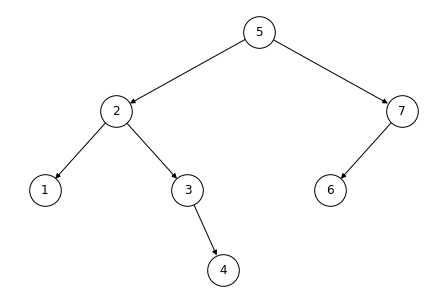

In [6]:
from math import inf
from termcolor import colored

def recursive_optimal_bst(k,p,q,i,j,visualize=False,verbose=False,first_call=True):
  # Contador de llamadas recursivas
  global c
  c = c+1

  if verbose and first_call:
    print(f"Entrada:")
    print(f"Claves del árbol: {k}")
    print(f"Probabilidades de las claves reales: {np.around(p,3)}")
    print(f"Probabilidades de las claves ficticias: {np.around(q,3)}\n")

  # Caso base
  if j < i: return q[i-1], Tree()

  # Suma de probabilidades de los nodos del árbol
  w = sum(p[i-1:j]) + sum(q[i-1:j+1])

  if verbose:
    print(f"Calculando suma de probabilidades para los nodos {i}..{j}: ", end='')
    print(f"({colored(round(w,3), 'blue')})\n")

  # Nos aseguramos de que e se actualice en la primera iteración
  e = inf

  for r in range(i, j+1):
    # Costo óptimo del subárbol izquierdo
    left_e, left_t = recursive_optimal_bst(k, p, q, i, r-1, visualize=False,
                                           verbose=False, first_call=False)

    # Costo óptimo del subárbol derecho
    right_e, right_t = recursive_optimal_bst(k, p, q, r+1, j, visualize=False,
                                             verbose=False, first_call=False)

    # Costo óptimo del árbol con raíz r
    x = left_e + right_e + w

    # Nos quedamos con el costo mínimo
    if x < e:
      e = x

      # Se reconstruye el árbol insertando la raíz y sus respectivos subárboles
      tree = Tree()
      tree.set_root(k[r-1])
      tree.set_left_subtree(left_t)
      tree.set_right_subtree(right_t)

    if verbose:
      print(f"Calculando costo esperado para árbol con raíz {r}")
      print(f"Calculando recursivamente costo para subárbol {i}..{r-1}: ", end='')
      print(f"({colored(round(right_e,3), 'green')})")
      print(f"Calculando recursivamente costo para subárbol {r+1}..{j}: ", end='')
      print(f"({colored(round(left_e,3), 'magenta')})")
      print(f"Costo esperado: {round(left_e,3)} + {round(right_e,3)} + {round(w,3)} = {round(x,3)}")
      print(f"Costo esperado mínimo: {round(e,3)}\n")

  if verbose:
    print(f"Costo mínimo del árbol: {round(e,3)}")

  # Se dibuja el árbol 
  if visualize:
    visualize_tree(tree)

  return e, tree

c = 0
k = [1, 2, 3, 4, 5, 6, 7]
p = [0.04, 0.06, 0.08, 0.02, 0.10, 0.12, 0.14]
q = [0.06, 0.06, 0.06, 0.06, 0.05, 0.05, 0.05, 0.05]

e = recursive_optimal_bst(k,p,q,1,len(p),visualize=True)[0]

print(f"Costo esperado mínimo: {e}")
print(f"Llamadas recursivas: {c}")

### Optimal BST (bottom-up)

Costo esperado mínimo: 2.75
Subproblemas resueltos: 15


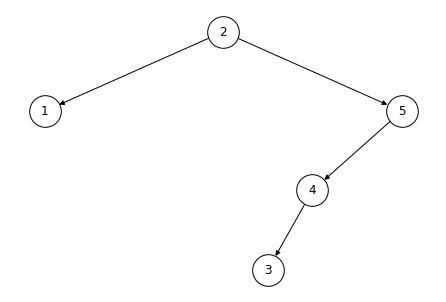

In [7]:
import numpy as np
from math import inf

def optimal_bst(keys,p,q,n,visualize=False,verbose=False):
  # Contador de subproblemas
  global s

  # Matriz que almacena el costo mínimo de cada subárbol
  e = np.zeros(shape=(n+2,n+1))

  # Matriz que almacena la suma de probabilidades de cada subárbol
  w = np.zeros(shape=(n+2,n+1))

  # Matriz que almacena la raíz óptima de cada subárbol
  root = np.zeros(shape=(n+1,n+1), dtype=int)

  if verbose:
    print(f"Entrada:")
    print(f"Claves del árbol: {keys}")
    print(f"Probabilidades de las claves reales: {np.around(p,3)}")
    print(f"Probabilidades de las claves ficticias: {np.around(q,3)}\n")

  # Valores para búsquedas fallidas
  for i in range(1,n+2):
    e[i][i-1] = q[i-1]
    w[i][i-1] = q[i-1]

  if verbose:
    print("Inicializando matriz de probabilidades:")
    print_matrix(w,n+2,n+1,0,'blue')
    print("Inicializando matriz de costos:")
    print_matrix(e,n+2,n+1,0,'green')

  for k in range(1,n+1):
    for i in range(1,n-k+2):
      j = i+k-1
      s = s+1

      # Se calcula la suma de probabilidades para el subárbol i..j
      w[i][j] = w[i][j-1] + p[j-1] + q[j]

      if verbose:
        print(f"Calculando suma de probabilidades para los nodos {i}..{j}: ", end='')
        print(f"({colored(round(w[i][j],3), 'blue')})")

      # Nos aseguramos de que e[i][j] se actualice en la primera iteración
      e[i][j] = inf

      for r in range(i,j+1):
        # Costo óptimo del árbol con raíz r
        x = e[i][r-1] + e[r+1][j] + w[i][j]

        # Nos quedamos con el costo mínimo
        if x < e[i][j]:

          # Guardamos el costo en la matriz e y la raíz en la matriz root
          e[i][j] = x
          root[i][j] = r

      if verbose:
        print(f"Calculando costo esperado para subárbol {i}..{j}: ", end='')
        print(f"({colored(round(e[i][j],3), 'green')})\n")

    if verbose:
      print("Matriz de probabilidades:")
      print_matrix(w,n+2,n+1,k,'blue')
      print("Matriz de costos:")
      print_matrix(e,n+2,n+1,k,'green')

  if verbose:
    print(f"Costo mínimo del árbol: {round(e[1][n],3)}")

  # Se reconstruye el árbol
  tree = construct_optimal_bst(root, keys, 1, n)

  # Se dibuja el árbol
  if visualize:
    visualize_tree(tree)

  return e[1][n], tree

def construct_optimal_bst(root, k, i, j):
  # Caso base
  if i > j: return Tree()

  # Raíz del árbol i..j
  r = root[i][j]

  # Se reconstruye cada subárbol
  left_t = construct_optimal_bst(root, k, i, r-1)
  right_t = construct_optimal_bst(root, k, r+1, j)

  # Se reconstruye el árbol insertando la raíz y sus respectivos subárboles
  tree = Tree()
  tree.set_root(k[r-1])
  tree.set_left_subtree(left_t)
  tree.set_right_subtree(right_t)

  return tree
  
s = 0
k = [1, 2, 3, 4, 5]
p = [0.15, 0.10, 0.05, 0.10, 0.20]
q = [0.05, 0.10, 0.05, 0.05, 0.05, 0.10]

e = optimal_bst(k,p,q,5,visualize=True)[0]

print(f"Costo esperado mínimo: {e}")
print(f"Subproblemas resueltos: {s}")

## 2.2 Descripción del algoritmo

### Algoritmo recursivo

La entrada consiste en un arreglo $K$ con las claves de los nodos $k_i$, más un arreglo $P$ con las probabilidades $p_{i}$ para cada clave $k_i$, más un arreglo $Q$ con las probabilidades $q_{i-1}$ para cada clave ficticia $d_i$, con $i = 1 \ldots n$. Además el algoritmo recibe dos índices $i$ y $j$ que determinan las claves $k_i$ inicial y $k_j$ final del subárbol a ser procesado en cada llamada recursiva. Los pasos del algoritmo son los siguientes:

1. Se calcula la suma de todas las probabilidades $k_i \ldots k_j$ y $q_{i-1} \ldots q_j$

2. Se selecciona cada nodo $i \ldots j$ como la raíz del árbol.

3. Se calcula recursivamente el subárbol óptimo izquierdo y derecho a partir de la raíz previamente escogida.

4. El costo esperado se calcula como el costo del subárbol izquierdo más el costo del subárbol derecho más la suma de las probabilidades.

5. Se guarda el costo mínimo de todos los costos obtenidos.

6. Se reconstruye el árbol a partir de la raíz y los subárboles que minimizan el costo.

7. Se retorna el árbol óptimo y su costo esperado.

### Algoritmo bottom-up

La entrada consiste en un arreglo $K$ con las claves de los nodos $k_i$, más un arreglo $P$ con las probabilidades $p_{i}$ para cada clave $k_i$, más un arreglo $Q$ con las probabilidades $q_{i-1}$ para cada clave ficticia $d_i$, con $i = 1 \ldots n$. Además, el algoritmo recibe la cantidad $n$ de claves a ser procesadas. Los pasos del algoritmo son los siguientes:

1. Se crean tres matrices, $E$, $W$ y $root$ para guardar el costo esperado, la suma de probabilidades y la raíz óptima para cada subárbol $i \ldots j$

2. Se inicializan las matrices $E$ y $W$ con los valores correspondientes a las búsquedas fallidas.

3. Se calcula el valor de $E_{i,j}$ y $W_{i,j}$ para cada subárbol $i \ldots j$, comenzando desde los problemas más pequeños.

4. Se calcula $W_{i,j}$ como $W_{i,j-1} + P_{j-1} + Q_{j}$ y se guarda en la casilla correspondiente de la matriz $W$. 

5. Para encontrar el costo esperado de cada subárbol se selecciona cada nodo $i \ldots j$ como la raíz $r$.

6. Se calcula $E_{i,j}$ como $E_{i,r-1} + E_{r+1,j} + W_{i,j}$.

7. Se guarda el costo mínimo de todos los costos obtenidos y se guarda en la casilla correspondiente de la matriz $E$. La raíz que minimiza el costo se guarda en la matriz $root$.

8. Al finalizar las iteraciones, se reconstruye recursivamente el árbol a partir de la raíz óptima del problema original, la cual quedará guardada en $root_{1,n}$.

9. Se retorna el árbol óptimo y su costo esperado, el cual quedará guardado en $E_{1,n}$.






## 2.3 Ejemplo (algoritmo bottom-up)


Consideremos los siguientes arreglos de entrada, con $n = 3$:

$K = [1,2,3]$

$P = [0.2, 0.15, 0.3]$

$Q = [0.05, 0.10, 0.15, 0.05]$

Inicializamos las posiciones de las matrices $E$ y $W$ que representan búsquedas fallidas, es decir, todas las casillas $i,j$ donde se cumple que $i = j + 1$

<img src="https://drive.google.com/uc?export=view&id=1tquVBZ_8jMhd3QgyOn3je6iAIFZDhOB-" width="500"/>

Comenzamos calculando los subproblemas más pequeños, empezando por el subarbol $1 \ldots 1$. La única raíz posible de este subárbol es 1, por lo tanto, el costo para el subárbol izquierdo $E_{i,r-1}$ y para el subárbol derecho $E_{r+1,j}$ será $E_{1,0}$ y $E_{2,1}$ respectivamente. Calculemos, en primer lugar, la suma de probabilidades para este subárbol:

$W_{i,j} = W_{i,j-1} + P_{j-1} + Q_{j}$

$W_{1,1} = W_{1,0} + P_{0} + Q_{1} = 0.05 + 0.2 + 0.10 = 0.35$

Luego, procedemos a calcular el costo esperado:

$E_{i,j} = E_{i,r-1} + E_{r+1,j} + W_{i,j}$

$E_{1,1} = E_{1,0} + E_{2,1} + W_{1,1} = 0.05 + 0.10 + 0.35 = 0.50$

Repetimos el procedimiento con el resto de casillas de esta diagonal:

<img src="https://drive.google.com/uc?export=view&id=1MNtj6BUp5ZOHwfj_qTUe7lzDGVPmh_W8" width="500"/>

Luego, para calcular el costo esperado del subárbol $1 \ldots 2$, existen dos raíces posibles, sin embargo, notemos que la suma de probabilidades no depende de la raíz escogida:

$W_{1,2} = W_{1,1} + P_{1} + Q_{2} = 0.35 + 0.15 + 0.15 = 0.65$

Procedemos a calcular el costo esperado para cada caso.

Para $r = 1$:

$E_{1,2} = E_{1,0} + E_{2,2} + W_{1,2} = 0.05 + 0.65 + 0.65 = 1.35$

Para $r = 2$:

$E_{1,2} = E_{1,1} + E_{3,2} + W_{1,2} = 0.50 + 0.15 + 0.65 = 1.30$

Nos quedamos con el costo mínimo $E_{1,2} = 1.30$ y repetimos este paso para la casilla $E_{2,3}$.

<img src="https://drive.google.com/uc?export=view&id=1c4ybZnc7zhsIlx5fO5NHrZm3L-rC8E_8" width="500"/>

Por último, calculamos el costo esperado para el árbol $1 \ldots 3$, que corresponde a nuestro problema inicial. Comenzamos por calcular la suma de probabilidades para este árbol.

$W_{1,3} = W_{1,2} + P_{2} + Q_{3} = 0.65 + 0.30 + 0.05 = 1.00$

Observemos que nuestro resultado es 1, pues corresponde a la suma de probabilidades de todas las claves ficticias y reales. Luego, procedemos a calcular el costo esperado considerando cada uno de los nodos como la raíz del árbol:

Para $r = 1$:

$E_{1,3} = E_{1,0} + E_{2,3} + W_{1,3} = 0.05 + 1.45 + 1.00 = 2.50$

Para $r = 2$:

$E_{1,3} = E_{1,1} + E_{3,3} + W_{1,3} = 0.50 + 0.70 + 1.00 = 2.20$

Para $r = 3$:

$E_{1,3} = E_{1,2} + E_{4,3} + W_{1,3} = 1.30 + 0.05 + 1.00 = 2.35$

Finalmente, obtenemos que el costo esperado mínimo para el problema inicial es $E_{1,3} = 2.20$

<img src="https://drive.google.com/uc?export=view&id=1KCFY2eoI2qYZ6Kfbr7AA_KyILBbTsiw0" width="500"/>

## 2.4. Ejecución del algoritmo paso a paso (`verbose=True`)

Usando la opción `verbose=True`, podemos ver lo que ocurre en cada paso de ambos algoritmos.



### Optimal BST (recursivo)

In [12]:
import random
import numpy as np

def optimal_bst_instance_generator(n):
    keys = sorted(random.sample(range(1, 101), n))
    arr = np.random.random(n*2+1)
    arr /= arr.sum()
    
    p = list(arr[:n]) # Probabilidad de las claves
    q = arr[n:] # Probabilidad de las claves ficticias
    return keys, p, q

Entrada:
Claves del árbol: [8, 32, 36, 62, 77]
Probabilidades de las claves reales: [0.228 0.114 0.076 0.044 0.054]
Probabilidades de las claves ficticias: [0.015 0.044 0.041 0.085 0.274 0.026]

Calculando suma de probabilidades para los nodos 1..5: (1.0)

Calculando costo esperado para árbol con raíz 1
Calculando recursivamente costo para subárbol 1..0: (2.138)
Calculando recursivamente costo para subárbol 2..5: (0.015)
Costo esperado: 0.015 + 2.138 + 1.0 = 3.154
Costo esperado mínimo: 3.154

Calculando costo esperado para árbol con raíz 2
Calculando recursivamente costo para subárbol 1..1: (1.58)
Calculando recursivamente costo para subárbol 3..5: (0.346)
Costo esperado: 0.346 + 1.58 + 1.0 = 2.926
Costo esperado mínimo: 2.926

Calculando costo esperado para árbol con raíz 3
Calculando recursivamente costo para subárbol 1..2: (1.222)
Calculando recursivamente costo para subárbol 4..5: (0.74)
Costo esperado: 0.74 + 1.222 + 1.0 = 2.961
Costo esperado mínimo: 2.926

Calculando costo espe

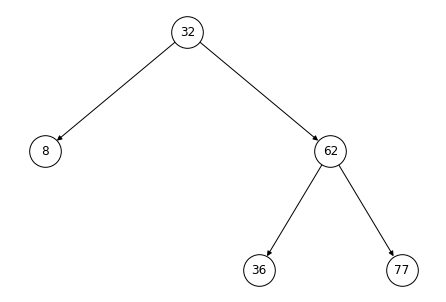

In [13]:
k, p, q = optimal_bst_instance_generator(5)
e, tree = recursive_optimal_bst(k,p,q,1,len(p),visualize=True,verbose=True)

### Optimal BST (bottom-up)

Entrada:
Claves del árbol: [3, 49, 54, 56, 67]
Probabilidades de las claves reales: [0.089 0.19  0.002 0.023 0.031]
Probabilidades de las claves ficticias: [0.182 0.143 0.126 0.026 0.15  0.04 ]

Inicializando matriz de probabilidades:
   0     1     2     3     4     5     
1  0.182 0.000 0.000 0.000 0.000 0.000 
2  0.000 0.143 0.000 0.000 0.000 0.000 
3  0.000 0.000 0.126 0.000 0.000 0.000 
4  0.000 0.000 0.000 0.026 0.000 0.000 
5  0.000 0.000 0.000 0.000 0.150 0.000 
6  0.000 0.000 0.000 0.000 0.000 0.040 

Inicializando matriz de costos:
   0     1     2     3     4     5     
1  0.182 0.000 0.000 0.000 0.000 0.000 
2  0.000 0.143 0.000 0.000 0.000 0.000 
3  0.000 0.000 0.126 0.000 0.000 0.000 
4  0.000 0.000 0.000 0.026 0.000 0.000 
5  0.000 0.000 0.000 0.000 0.150 0.000 
6  0.000 0.000 0.000 0.000 0.000 0.040 

Calculando suma de probabilidades para los nodos 1..1: (0.414)
Calculando costo esperado para subárbol 1..1: (0.738)

Calculando suma de probabilidades para los nodos 2..2

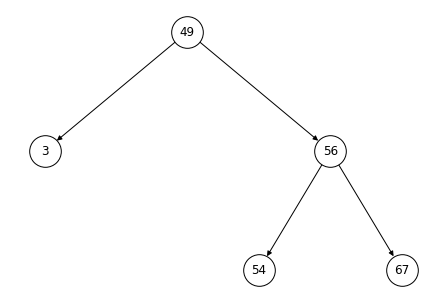

In [14]:
k, p, q = optimal_bst_instance_generator(5)
e, tree = optimal_bst(k,p,q,5,visualize=True,verbose=True)

# 3. Correctitud

### **Teorema 1: Correctitud de Optimal BST (bottom-up)**

*El algoritmo **Optimal BST** retorna correctamente el costo esperado mínimo para un árbol con claves $k_1 \ldots k_n$*

## Prueba del Teorema

### Subestructura óptima

La subestructura óptima para este algoritmo considera que, si un árbol $T$ con claves $k_{i} \ldots k_{j}$ es óptimo, necesariamente sus subárboles también deben serlo. Si un subárbol no lo fuera, estaríamos diciendo que existe otro subárbol con un menor costo esperado. De cumplirse este caso, estaríamos contradiciendo la optimalidad de $T$.

Además, sabemos que para un árbol con claves $k_i \ldots k_j$ existe una clave $k_{r}$ para la cual el subárbol izquierdo con claves $k_i \ldots k_{r-1}$ y el subárbol derecho con claves $k_{r+1} \ldots k_{j}$ son óptimos. Es decir, si seleccionamos cada una de las claves del árbol como raíz, nos aseguramos de encontrar un árbol de búsqueda óptimo.

Es importante notar que al elegir uno de los nodos extremos como raíz, obtendremos un subárbol vacío. En la práctica, debemos considerar que cada subárbol contiene, además de claves $k_i \ldots k_j$, claves ficticias $d_{i-1} \ldots d_j$, que igualmente serán consideradas para el cálculo de la solución. Por lo tanto, si escogemos como raíz la clave $k_i$, el subárbol izquierdo no contendrá claves reales, sino una única clave ficticia $d_{i-1}$. Del mismo modo, si escogemos como raíz la clave $k_j$, el subárbol derecho contendrá una única clave ficticia $d_j$.

### Solución recursiva

Definiremos $e[i, j]$ como el costo esperado mínimo de un árbol con claves $k_i \ldots k_j$. En primer lugar, consideremos los casos extremos. Cuando $k_r = k_i$, el costo para el subárbol izquierdo se expresará como $e[i,i-1]$, mientras que, cuando $k_r = k_j$, el costo para el subárbol derecho será $e[j+1,j]$. En ambos casos, el costo esperado $e[i, j]$ se calculará como $q_{i-1}$, que corresponde a la probabilidad de búsqueda de la única clave ficticia de estos árboles.

Para el caso general, calcularemos el costo mínimo considerando cada uno de los nodos como la raíz del árbol, con $r = i \ldots j$. Los costos para los subárboles izquierdo y derecho se expresarán como $e[i, r-1]$ y $e[r+1, j]$ respectivamente. Sin embargo, debemos considerar que cada uno de estos árboles pasará a ser un subárbol del nodo con clave $k_r$, por lo tanto, debemos calcular la variación que esto produce en el costo esperado. Recordemos que la fórmula del costo esperado es:

$E(T) = \sum\limits_{i=1}^{n} (h(k_i)+1) \cdot p_i + \sum\limits_{i=0}^{n} (h(d_i)+1) \cdot q_i$

$E(T) = 1 + \sum\limits_{i=1}^{n} h(k_i) \cdot p_i + \sum\limits_{i=0}^{n} h(d_i) \cdot q_i$

A partir de esta fórmula, obtenemos que al aumentar la profundidad del árbol en 1, el costo esperado aumenta con un factor equivalente a la suma de probabilidades de los nodos del árbol. Esta suma se define como:

$w(i, j) = \sum\limits_{k=i}^{j} p_k + \sum\limits_{k=i-1}^{j} q_k$

Por lo tanto, si $k_r$ es la raíz de un árbol óptimo con claves $k_i \ldots k_j$, tenemos que:

$e[i, j] = p_r + (e[i, r-1] + w(i, r-1)) + (e[r+1, j] + w(r+1, j))$

Observemos que:

$w(i, j) = p_r + w(i, r-1) + w(r+1, j)$

Reescribiendo la fórmula para $e[i, j]$:

$e[i, j] = e[i, r-1] + e[r+1, j] + w(i, j)$

Finalmente, la fórmula recursiva final para $e[i, j]$, considerando los casos extremos y todos los valores posibles de $r$ es: 

$   
e[i, j] = 
     \begin{cases}
       q_{i-1} &\quad\text{si } i = j+1 \\
       \min\limits_{i \leq r \leq j} \{e[i, r-1] + e[r+1, j] + w(i, j)\} &\quad\text{si } i \leq j \\
     \end{cases}
$

### Correctitud

Definiremos el tamaño del problema como la cantidad de claves reales contenidas en el árbol. Considerando esta definición, demostraremos la correctitud del algoritmo utilizando la siguiente propiedad invariante de bucle:

> Al comienzo de cada iteración $k = 1 \ldots n$, la matriz $E$ contiene la solución a todos los subproblemas de tamaño $0 \ldots k-1$.

**Inicialización**

El primer paso del algoritmo consiste en inicializar la matriz $E$ con el costo óptimo para los subárboles vacíos, es decir, aquellos que no contienen claves reales sino una sola clave ficticia. Un subárbol vacío $i \ldots j$ corresponde al caso base de la fórmula recursiva antes planteada, cumpliéndose que $i = j + 1$.

<img src="https://drive.google.com/uc?export=view&id=17TtKNkGt5wOsP-9IR3g3tLksoceV5Llz" width="300"/>

Por lo tanto, al comienzo de la primera iteración ($k = 1$), se habrá calculado correctamente la solución a todos los subproblemas de tamaño 0.

**Mantención**

Asumiremos mediante inducción que, para cualquier $k \geq 1$, se cumple la propiedad, es decir, la matriz $E$ contiene la solución a todos los subproblemas de tamaño menor a $k$.

En primer lugar, notemos que para cada subárbol $i \ldots j$, el tamaño del problema se calcula como $k = j - i + 1$. Además, sabemos que para cualquier $k \geq 1$, la fórmula utilizada para calcular el costo esperado será $e[i, j] = \min\limits_{i \leq r \leq j} \{e[i, r-1] + e[r+1, j] + w(i, j)\}$

Para calcular el costo esperado, se considera cada clave como una posible raíz del árbol óptimo. Sabemos que:

*   El subárbol izquierdo contiene los nodos $i \ldots r-1$. En el peor de los casos, cuando $r = j$, se generará un subproblema de tamaño $k_l = j - i$
*   El subárbol derecho contiene los nodos $r+1 \ldots j$. En el peor de los casos, cuando $r = i$, se generará un subproblema de tamaño $k_r = j - i$

En ambos casos, se cumple que el tamaño del problema original $k$ es mayor al tamaño de los subproblemas resultantes. Además, por la hipótesis inductiva, sabemos que la matriz contiene la solución para estos subproblemas.

Por último, para calcular $w(i,j)$, utilizamos la fórmula $w(i,j) = w(i,j-1) + p_{j-1} + q_{j}$. Mediante un razonamiento similar, podemos formular que la matriz $W$ contiene el valor de $w(i,j)$ para todos los subproblemas de tamaño menor a $k$. Luego, el valor de $w(i,j-1)$ será conocido, y podremos calcular correctamente la suma de probabilidades para el subárbol $i \ldots j$.

<img src="https://drive.google.com/uc?export=view&id=1OPuF-AitdoqiiMT_ViQK4ZUk1dcBFMIz" width="1050"/>

**Correctitud**

Finalmente, como la propiedad invariante es verdadera al inicio del bucle y se mantiene en cada iteración, podemos decir que al finalizar la $k$-ésima iteración del algoritmo, se obtiene el costo esperado para el subárbol $1 \ldots n$, que corresponde a la solución del problema inicial. $\Box$


# 4. Tiempo de ejecución y complejidad espacial

### **Teorema 2: Tiempo de ejecución del algoritmo Optimal BST (recursivo)**

*El algoritmo **Optimal BST** recursivo tiene un tiempo de ejecución $\Theta(3^n)$.*

## Prueba del teorema

Notemos que el algoritmo calcula recursivamente la solución para el subárbol izquierdo y derecho a partir de la raíz $r$, la cual varía entre 1 y $n$. A partir de esto, podemos expresar el tiempo de ejecución del algoritmo mediante la siguiente función de recurrencia:

$   
T(n) = 
     \begin{cases}
       \Theta(1) &\quad\text{si } n = 0 \\
       \sum\limits_{r=1}^{n} T(r-1) + T(n-r) &\quad\text{si } n \geq 1 \\
     \end{cases}
$

Desarrollando la fórmula para $n \geq 1$, nos queda:

$T(n) = T(0) + \ldots + T(n-1) + T(n-1) + \ldots + T(0)$

$T(n) = 2 \cdot [T(0) + T(1) + ... + T(n-1) ]$

$T(n) = 2 \cdot \sum\limits_{r=1}^{n} T(r-1)$

Luego, podemos demostrar por inducción que $T(n) = 3^n$. Para el caso base, tenemos que $T(0) = 3^0 = 1$. Aplicando la hipótesis inductiva a la ecuación anterior, obtenemos:

$T(n) = 1 + 2 \cdot \sum\limits_{r=1}^{n} 3^{r-1}$

$T(n) = 1 + 2 \cdot \frac{3^n - 1}{3-1}$

$T(n) = 1 + 3^n - 1$

$T(n) = 3^n$

Por lo tanto, la complejidad temporal del algoritmo Optimal BST recursivo es $\Theta(3^n)$. $\Box$

### **Teorema 3: Tiempo de ejecución del algoritmo Optimal BST (bottom-up)**

*El algoritmo **Optimal BST** implementado con programación dinámica tiene un tiempo de ejecución $\Theta(n^3)$.*

## Prueba del teorema

Para demostrar el teorema, calcularemos matemáticamente la cantidad de subproblemas que debe resolver este algoritmo. Observemos que la cantidad de subproblemas corresponde al número de subárboles a los cuales se calcula el costo esperado mínimo. Estos valores son almacenados en una matriz triangular superior, en las casillas que se muestran en la figura ($n = 5$).

<img src="https://drive.google.com/uc?export=view&id=11dEi4btP5Y6Vcw8FGj41ccUOeoZ-5xpM" width="300"/>

Generalizando, para un problema de tamaño $n$ se ocupará la mitad de casillas de una matriz $n \times n$, es decir, se resolverán exactamente $\frac{n^2}{2}$ subproblemas. Por lo tanto, podemos decir que la cantidad de subproblemas a resolver tiene complejidad $O(n^2)$.

Luego, cada subproblema es resuelto con la fórmula:

$  
e[i,j] = 
     \begin{cases}
       q_{i-1} &\quad\text{si } j = i - 1\\
       \min\limits_{i \leq r \leq j} e[i,r-1] + e[r+1,j] + w[i,j] &\quad\text{si } i \leq j\\
     \end{cases}
$

Como se puede ver, calcular este resultado requiere iterar por todas las raíces posibles que puede tener el subárbol $i \ldots j$. Por lo tanto, encontrar la solución a cada subproblema tiene un tiempo de $O(n)$.

Por último, reconstruir el árbol con la función `construct_optimal_bst` tiene un tiempo de ejecución $O(n)$.

Considerando esto, podemos calcular el tiempo total del algoritmo con la función $T(n) = f(n) \cdot g(n) + h(n)$, donde $f(n)$ corresponde a la cantidad de subproblemas, $g(n)$ corresponde al tiempo necesario para resolver cada subproblema, y $h(n)$ es el tiempo empleado en reconstruir la solución final. Reemplazando, obtenemos:

$T(n) = O(n^2) \cdot O(n) + O(n)$

$T(n) = O(n^3)$

Finalmente, notemos que no existe un peor ni un mejor caso para este algoritmo. Puesto que se trata de un algoritmo de **optimización**, se considerarán todos los casos posibles para encontrar la solución final. Debido a esto, podemos decir que el tiempo ocupado por el algoritmo solo depende del tamaño del problema, y por lo tanto, podemos expresar su complejidad con la notación $\Theta(n^3)$. $\Box$

### **Teorema 4: Complejidad espacial del algoritmo Optimal BST (recursivo)**

*El algoritmo **Optimal BST** recursivo tiene una complejidad espacial de $O(n)$.*

## Prueba del teorema

Sabemos que la complejidad espacial del algoritmo es al menos $O(n)$, debido al espacio ocupado por los arreglos de entrada. Luego, debemos analizar la cantidad de espacio de memoria ocupado por el algoritmo, considerando también el espacio del stack usado por las llamadas recursivas.

Supongamos que, en cada llamada recursiva, calculamos la solución para el subárbol izquierdo considerando siempre el último elemento como raíz. Es decir, cada llamada recursiva disminuye la cantidad de nodos en 1, hasta llegar al caso base, cuando no hay nodos. En otras palabras, calculamos la solución para $n, n-1, n-2, \ldots 0$ nodos. Por lo tanto, podemos decir que como máximo, se guardarán $O(n)$ llamadas recursivas en el stack de forma **simultánea**. Considerando además que el espacio auxiliar ocupado por la función es $O(1)$, tenemos que la complejidad espacial del algoritmo es $O(n) \cdot O(1) = O(n)$. $□$

### **Teorema 5: Complejidad espacial del algoritmo Optimal BST (bottom-up)**

*El algoritmo **Optimal BST** implementado con programación dinámica tiene una complejidad espacial de $O(n^2)$.*

## Prueba del teorema

Para este algoritmo, se ocupan 3 matrices de complejidad espacial $O(n^2)$ para guardar los datos relevantes de cada subproblema. Considerando que no se hacen llamadas recursivas y el resto de variables auxiliares ocupan un espacio $O(1)$, podemos afirmar que la complejidad espacial de este algoritmo es $O(n^2)$. $\Box$


# 5. Experimentos

## 5.1. Comparación entre implementación recursiva y bottom-up


### Tiempo experimental de Optimal BST (recursivo)

Los valores de entrada para este gráfico serán generados de forma aleatoria con $n \in [5,15]$

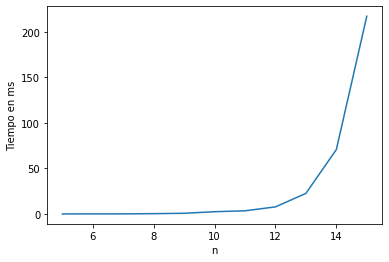

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from timeit import repeat

x=[]; y=[];

for n in range(5,16):
  k, p, q = optimal_bst_instance_generator(n)
  t = repeat(setup="from __main__ import recursive_optimal_bst", stmt=f"recursive_optimal_bst({k},{p},{q.tolist()},{1},{n})", repeat=1, number=10)

  x.append(n)
  y.append(t)

plt.plot(x,y)
plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### Tiempo experimental de Optimal BST (bottom-up)

Los valores de entrada para este gráfico serán generados de forma aleatoria con $n \in [5,100]$

In [ ]:
x=[]; y=[];

for n in range(5,100):
  k, p, q = optimal_bst_instance_generator(n)
  t = repeat(setup="from __main__ import optimal_bst", stmt=f"optimal_bst({k},{p},{q.tolist()},{n})", repeat=1, number=10)

  x.append(n)
  y.append(t)

plt.plot(x,y, color='tab:orange')
plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### Tiempo experimental para ambos algoritmos

Los valores de entrada para este gráfico serán generados de forma aleatoria con $n \in [5,15]$

In [ ]:
x=[]; y1=[]; y2=[];

for n in range(5,16):
  k, p, q = optimal_bst_instance_generator(n)
  t1 = repeat(setup="from __main__ import recursive_optimal_bst", stmt=f"recursive_optimal_bst({k},{p},{q.tolist()},{1},{n})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import optimal_bst", stmt=f"optimal_bst({k},{p},{q.tolist()},{n})", repeat=1, number=10)

  x.append(n)
  y1.append(t1)
  y2.append(t2)

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Recursivo", "Bottom-up"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### Análisis de resultados

Como era de esperar, el tiempo de ejecución del algoritmo recursivo crece a un nivel exponencial, a diferencia de la implementación con programación dinámica, cuya curva tiene un crecimiento polinómico.

A la hora de comparar ambos algoritmos, podemos notar que el tiempo del algoritmo recursivo predomina totalmente en el gráfico. Esto se debe a la complejidad $O(3^n)$ del algoritmo recursivo, cuya tasa de crecimiento es significativamente mayor que la complejidad $O(n^3)$ del algoritmo bottom-up.


## 5.2. Optimal BST con raíz fija

A continuación se presenta un algoritmo modificado para el problema del árbol de búsqueda óptimo, el cual calcula un costo esperado mínimo aproximado, dejando como raíz del árbol al elemento con mayor probabilidad de ser buscado. Este algoritmo fue implementado tanto en su versión recursiva como en su versión con programación dinámica.

### Optimal BST modificado (recursivo)

In [ ]:
import numpy

def modified_recursive_optimal_bst(k,p,q,n):
  # Índice del nodo con mayor probabilidad (1...n)
  r = np.argmax(p) + 1

  e_left = recursive_optimal_bst(k,p,q,1,r-1)[0]
  e_right = recursive_optimal_bst(k,p,q,r+1,n)[0]
  e = e_left + e_right + sum(p) + sum(q)

  return e

k = [1, 2, 3, 4, 5]
p = [0.15, 0.10, 0.05, 0.10, 0.20]
q = [0.05, 0.10, 0.05, 0.05, 0.05, 0.10]

modified_recursive_optimal_bst(k,p,q,5)

### Optimal BST modificado (programación dinámica)

In [ ]:
import numpy

def modified_optimal_bst(k,p,q,n):
  # Índice del nodo con mayor probabilidad (0...n-1)
  r = np.argmax(p)

  e_left = optimal_bst(k[:r],p[:r],q[:r+1],r)[0]
  e_right = optimal_bst(k[r+1:],p[r+1:],q[r+1:],n-r-1)[0]
  e = e_left + e_right + sum(p) + sum(q)
  return e

k = [1, 2, 3, 4, 5]
p = [0.15, 0.10, 0.05, 0.10, 0.20]
q = [0.05, 0.10, 0.05, 0.05, 0.05, 0.10]

modified_optimal_bst(k,p,q,5)

### Comparación del costo esperado real vs aproximado

Puesto que ambos algoritmos tienen la misma salida, es irrelevante cuál de ellos se escoja para comparar el costo esperado. Sin embargo, por razones de eficiencia, se hará uso del algoritmo con programación dinámica.

Los valores de entrada para este gráfico serán generados de forma aleatoria con $n \in [5,100]$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x=[]; y1=[]; y2=[]

for n in range(5,101):
  k, p, q = optimal_bst_instance_generator(n)

  e_real = optimal_bst(k,p,q,n)[0]
  e_aprox = modified_optimal_bst(k,p,q,n)

  x.append(n)
  y1.append(e_real)
  y2.append(e_aprox)

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Costo real", "Costo aproximado"])

plt.xlabel('n')
plt.ylabel('Costo esperado')
plt.show()

### Comparación entre implementación recursiva real vs modificada

Los valores de entrada para este gráfico serán generados de forma aleatoria con $n \in [5,15]$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from timeit import repeat

x=[]; y1=[]; y2=[]

for n in range(5,16):
  k, p, q = optimal_bst_instance_generator(n)

  t1 = repeat(setup="from __main__ import recursive_optimal_bst", stmt=f"recursive_optimal_bst({k},{p},{q.tolist()},{1},{n})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import modified_recursive_optimal_bst", stmt=f"modified_recursive_optimal_bst({k},{p},{q.tolist()},{n})", repeat=1, number=10)

  x.append(n)
  y1.append(t1)
  y2.append(t2)

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Recursivo", "Recursivo modificado"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### Comparación entre implementación bottom-up real vs modificada

Los valores de entrada para este gráfico serán generados de forma aleatoria con $n \in [5,100]$

In [ ]:
x=[]; y1=[]; y2=[]

for n in range(5,101):
  k, p, q = optimal_bst_instance_generator(n)

  t1 = repeat(setup="from __main__ import optimal_bst", stmt=f"optimal_bst({k},{p},{q.tolist()},{n})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import modified_optimal_bst", stmt=f"modified_optimal_bst({k},{p},{q.tolist()},{n})", repeat=1, number=10)

  x.append(n)
  y1.append(t1)
  y2.append(t2)

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Bottom-up", "Bottom-up modificado"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### Análisis de resultados

Observando el primer gráfico, notamos que la variación entre el costo esperado mínimo real y el costo aproximado no es significativa, por lo cual, utilizar el algoritmo modificado no parece ser una mala opción, especialmente para problemas de gran tamaño.

Luego, si comparamos el tiempo de ejecución del algoritmo recursivo real con su versión modificada, observamos que esta última es más eficiente, sin embargo, debemos tener en cuenta que el tiempo ocupado por este algoritmo es variable, pues depende de dónde se encuentre la clave con mayor probabilidad. Si se encuentra al principio, se llamará a la función `recursive_optimal_bst` para encontrar el costo del subárbol derecho con $n-1$ nodos, lo cual se traduce en un tiempo de $O(3^{n-1})$. Si se encontrase a la mitad, encontrar el costo mínimo de ambos subárboles tendrá un tiempo aproximado de $2 \cdot O(3^{n/2})$. A pesar de esto, sabemos que la versión modificada siempre será más eficiente, pues en el peor caso, su complejidad será $O(3^{n-1})$.

Para el caso del algoritmo bottom-up y su versión modificada ocurre algo similar. Aplicando el mismo análisis, obtendremos que la complejidad en el peor caso del algoritmo modificado es $O((n-1)^3)$, y por lo tanto, siempre será más eficiente que la implementación original. 


